# Lecture 3: Data Analysis 

:::{warning}
This page is still building. Please be patient for the coming lectures.
:::

In this lecture, we will learn data analysis as well as presentation in Python
including follwoing four packages:

```{figure} ./images/turtles.jpeg
---
height: 300px
---
The "Four Musketeers" for Python data analysis: `numPy`, `matplotlib`, 
`pandas` and `seaborn`.
```

**Why you need Python data analysis**

Basically, modern office suite like `Microsoft Excel` provides powerful features 
to process and present your data. However, they are lacking of flexibility and 
the features are hidden in their complex UI (user interface). On the other hand,
Python gives us more efficient and flexible  way to operate data. For example,
`Microsoft Excel` has a maximum row number $1048576=2^{20}$ in `Office 2007` 
or later while `pandas` can easily exceed this limitation.
```{figure} images/pandas-rows.png
---
height: 250px
---
A table has 100,000,000 rows x 1 columns.
```

It is also possible to custom a pipeline with help of these packages so
you can analyze data automatically. Once you build one, you can just run 
it every time when you have new data rather than operating data again and again.

## Preparation
:::{warning}
This is an advanced lecture so it is recommended to learn [lecture 1](lec-1.md) and
[lecture 2](lec-2.md) before it if you have no background in Python programming. 
:::

Pandas is a data analysis and manipulation tools based on Python. To learn Pandas, 
the best material is the [official cookbook](https://pandas.pydata.org/pandas-docs/version/1.4.0/pandas.pdf) 
which can be found at the [official website](https://pandas.pydata.org). The [documentation for pandas](https://pandas.pydata.org/docs/) is 
also helpful for your learning.

```{figure} images/pandas-docs.png
---
height: 300px
---
A sample entry of pandas docs. `DataFrame` is the basic data container in `pandas`.
```

Before start everything, we need to install Pandas as well as some other packages via {guiLabel}`pip`.
- `numPy`: `pandas` is based on `numPy`, an efficient numerical computation package written in C++.
- `openpyxl`: `pandas` requires it to read data from excel file.
- `matplotlib`: a graphical package to draw figures.

In [1]:
!pip install -q pandas numpy openpyxl matplotlib

:::{note} 
- Here `-q` means quiet installation which can be ignored if you don not understand.
- In Jupyter Notebook, command starting with mark `!` is NOT native Python code, 
but a wrapped shell command, i.e. you can run `pip install numpy` to install `numPy`
in your {guiLabel}`Anaconda Prompt Shell`.
:::

Let us import these two packages with short names:

In [2]:
import numpy as np
import pandas as pd

## Data container
`Pandas` provides two types of container `Series` and `DataFrame` which are used to store sequential
and tabular data respectively. 
```{figure} images/series.png
---
height: 100px
---
`Series` storing sequential data.
```
```{figure} images/dataframe.png
---
height: 200px
---
`DataFrame` storing tabular data.
```

Run following code to create two data containers.

In [3]:
s = pd.Series([1,2,3,4,5,6])
d = pd.DataFrame(np.arange(1, 19).reshape(3, -1))

print(s)
print(d)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
    0   1   2   3   4   5
0   1   2   3   4   5   6
1   7   8   9  10  11  12
2  13  14  15  16  17  18


:::{note}
Here `np.arange(1, 19)` will generate a arrary from $1$ to $18$, and `reshape(3, -1)`
will change the shape of arrary with first dimension as $3$. Parameter `-1` means it will be 
derivated internally and here will be replaced with $6$ because $6=18\div 3$.
:::

`shape` is a property of container and it is a tuple of dimensions.

In [4]:
print(s.shape)
print(d.shape)

(6,)
(3, 6)


For very large `DataFrame`, `Jupyter notebook` will only show a part of the content:

In [5]:
d = pd.DataFrame(np.random.randn(100, 30))
d

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.306240,-0.061611,0.779984,-2.337055,-0.943123,-0.349840,0.875307,-1.266022,-0.136138,1.081146,...,0.510254,0.072996,-0.625173,1.467650,0.776503,-0.182904,-0.434539,1.803769,0.371428,-0.134464
1,0.564416,0.698498,-0.507794,-0.968791,0.397854,0.102837,-0.127172,-0.308133,0.220845,-1.565867,...,0.322148,-1.003378,-0.692078,-1.566500,-1.095755,-0.612774,-0.059283,-0.473592,-1.026126,-1.298467
2,-0.022133,-0.301985,1.062257,0.640781,-0.417655,-1.288552,-0.346588,0.542851,0.476821,1.314897,...,0.012141,0.077571,0.232534,-0.059046,0.458403,1.474450,1.132899,-2.212876,-0.738149,2.300046
3,-0.312576,-0.763421,0.017539,1.332786,1.558924,-1.541103,-1.276334,0.215874,-2.142381,0.289651,...,-1.372186,1.892248,0.145261,2.039979,1.283478,-0.659949,-0.937093,0.062956,0.112820,1.887922
4,0.698356,-0.147413,0.088415,0.040485,0.896300,-1.473397,-0.252203,0.503982,0.719868,-1.919217,...,-0.404915,0.117167,-2.634702,-0.368851,1.537464,0.276666,-0.555655,-0.080517,-0.549547,-0.014485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.030173,0.520579,-0.088985,0.505738,0.758943,-2.125331,2.110121,-0.643785,0.653406,1.737843,...,-1.197817,0.085870,-0.070311,-0.093512,-0.732207,-0.165026,-0.052608,1.274726,0.180678,-0.131143
96,0.724171,1.504935,-1.864202,1.743766,1.021755,-0.539055,1.247763,-0.298266,-0.097268,-0.230134,...,-2.120406,0.005262,-1.343994,-0.836619,0.417451,1.430887,-0.537734,0.753558,-0.386267,-1.374828
97,-0.137922,-0.735277,-1.128535,0.203943,-0.019424,1.499192,-0.586642,-1.594188,1.053992,-2.333686,...,1.119338,0.626797,-0.377950,0.805291,-0.235988,0.771549,0.086182,0.048302,-0.080636,-1.728695
98,-2.118018,0.105255,0.004242,-2.022938,0.860640,2.574860,2.170606,2.367764,-0.453150,-0.517674,...,0.155606,-0.726813,1.202586,-0.217078,-0.362934,-0.197063,-0.197072,0.592610,-1.061161,-0.506541


:::{note}
Here `np.random.randn(n, m)` will generate a random matrix with $n$ rows and $m$ columns.
Each element in the matrix follows the standard [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$ X\sim \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$
:::

Try `head(n)` and it will give you the first $n$ rows of the `DataFrame` while `tail(n)`
will give the last $n$ rows.

In [6]:
d.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.306240,-0.061611,0.779984,-2.337055,-0.943123,-0.349840,0.875307,-1.266022,-0.136138,1.081146,...,0.510254,0.072996,-0.625173,1.467650,0.776503,-0.182904,-0.434539,1.803769,0.371428,-0.134464
1,0.564416,0.698498,-0.507794,-0.968791,0.397854,0.102837,-0.127172,-0.308133,0.220845,-1.565867,...,0.322148,-1.003378,-0.692078,-1.566500,-1.095755,-0.612774,-0.059283,-0.473592,-1.026126,-1.298467
2,-0.022133,-0.301985,1.062257,0.640781,-0.417655,-1.288552,-0.346588,0.542851,0.476821,1.314897,...,0.012141,0.077571,0.232534,-0.059046,0.458403,1.474450,1.132899,-2.212876,-0.738149,2.300046
3,-0.312576,-0.763421,0.017539,1.332786,1.558924,-1.541103,-1.276334,0.215874,-2.142381,0.289651,...,-1.372186,1.892248,0.145261,2.039979,1.283478,-0.659949,-0.937093,0.062956,0.112820,1.887922
4,0.698356,-0.147413,0.088415,0.040485,0.896300,-1.473397,-0.252203,0.503982,0.719868,-1.919217,...,-0.404915,0.117167,-2.634702,-0.368851,1.537464,0.276666,-0.555655,-0.080517,-0.549547,-0.014485


In order to make our examples meaningful, 
we employ a real-world dataset as an example to show how `pandas` works. [World Health Organization](https://covid19.who.int/info)
provides latest data about the COVID-19 such as vaccination and confirmed cases, which is keeped in CSV-format files. Here we 
refer to the vaccination data: [https://covid19.who.int/who-data/vaccination-data.csv](https://covid19.who.int/who-data/vaccination-data.csv).

In [7]:
vac = pd.read_csv('https://covid19.who.int/who-data/vaccination-data.csv')
vac

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2022-03-06,5597130,4952744.0,14.378,12.723,4281934.0,11.000,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2022-02-20,2707658,1284034.0,94.100,45.118,1192155.0,41.889,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2022-02-20,13631683,7456361.0,31.086,17.004,6076272.0,13.857,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,ASM,WPRO,REPORTING,2022-02-16,85050,42212.0,154.084,76.475,37805.0,68.491,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,AND,EURO,REPORTING,2022-02-13,142420,57797.0,184.300,75.872,53250.0,69.903,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Viet Nam,VNM,WPRO,REPORTING,2022-02-24,192865986,79469390.0,198.139,81.642,75322542.0,77.382,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0
224,Wallis and Futuna,WLF,WPRO,REPORTING,2022-02-18,15633,6450.0,139.009,57.354,6399.0,56.900,Moderna - Spikevax,2021-03-19,1.0
225,Yemen,YEM,EMRO,REPORTING,2022-03-06,784792,624837.0,2.631,2.095,384655.0,1.290,"Janssen - Ad26.COV 2-S,SII - Covishield,Sinova...",2021-04-20,3.0
226,Zambia,ZMB,AFRO,REPORTING,2022-03-03,2858338,2510296.0,15.548,13.655,1883799.0,10.247,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-04-14,3.0


:::{note}
`read_csv(path)` reads a CSV-format file from URL (Web link or local file) and returns a `DataFrame`.
For example, you can use `pd.read_csv('./data.csv')` to load csv file from your current directory.
:::


Properties `index` and `columns` will give the row/column labels:

In [8]:
vac.columns

Index(['COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED'],
      dtype='object')

In addition, you may want to sort by values, just like what we usually do in `Excel`.

In [9]:
vac.sort_values(by='TOTAL_VACCINATIONS', ascending=False)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
43,China,CHN,WPRO,REPORTING,2022-02-27,3138003103,1.276556e+09,213.283,86.765,1.235633e+09,83.983,"Anhui ZL - Recombinant,Beijing CNBG - BBIBP-Co...",2020-07-22,8.0
94,India,IND,SEARO,REPORTING,2022-02-28,1776718549,9.642345e+08,128.747,69.872,7.923996e+08,57.420,"Bharat - Covaxin,Gamaleya - Gam-Covid-Vac,Jans...",2021-01-16,6.0
218,United States of America,USA,AMRO,REPORTING,2022-02-25,537567013,2.531571e+08,162.406,76.482,2.101726e+08,63.496,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-14,3.0
29,Brazil,BRA,AMRO,REPORTING,2022-02-25,369527744,1.723341e+08,173.847,81.076,1.487775e+08,69.993,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2021-01-17,5.0
95,Indonesia,IDN,SEARO,REPORTING,2022-03-01,345697245,1.909768e+08,126.387,69.821,1.445058e+08,52.831,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-01-13,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Saba,XCA,AMRO,REPORTING,2022-02-25,3148,1.582000e+03,162.856,81.842,1.566000e+03,81.014,NaN,NaN,NaN
186,Sint Eustatius,XBA,AMRO,REPORTING,2022-02-25,3110,1.588000e+03,99.076,50.589,1.522000e+03,48.487,NaN,NaN,NaN
149,Niue,NIU,WPRO,REPORTING,2021-11-24,2628,1.340000e+03,162.423,82.818,1.288000e+03,79.604,Pfizer BioNTech - Comirnaty,2021-06-08,1.0
206,Tokelau,TKL,WPRO,REPORTING,2021-09-28,1936,9.680000e+02,143.407,71.704,9.680000e+02,71.704,Pfizer BioNTech - Comirnaty,2021-07-20,1.0


`T` property will return a transpose of `DataFrame`.

In [10]:
vac.T

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
COUNTRY,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
ISO3,AFG,ALB,DZA,ASM,AND,AGO,AIA,ATG,ARG,ARM,...,USA,URY,UZB,VUT,VEN,VNM,WLF,YEM,ZMB,ZWE
WHO_REGION,EMRO,EURO,AFRO,WPRO,EURO,AFRO,AMRO,AMRO,AMRO,EURO,...,AMRO,AMRO,EURO,WPRO,AMRO,WPRO,WPRO,EMRO,AFRO,AFRO
DATA_SOURCE,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,...,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING,REPORTING
DATE_UPDATED,2022-03-06,2022-02-20,2022-02-20,2022-02-16,2022-02-13,2022-03-02,2022-02-25,2022-02-25,2022-02-25,2022-02-13,...,2022-02-25,2022-02-25,2022-02-20,2022-02-20,2022-02-25,2022-02-24,2022-02-18,2022-03-06,2022-03-03,2022-03-04
TOTAL_VACCINATIONS,5597130,2707658,13631683,85050,142420,16633167,22165,124726,93008081,1971565,...,537567013,7612199,42121870,197335,37860994,192865986,15633,784792,2858338,7904719
PERSONS_VACCINATED_1PLUS_DOSE,4952744.0,1284034.0,7456361.0,42212.0,57797.0,10780927.0,10370.0,63582.0,40572052.0,1080404.0,...,253157102.0,2964083.0,18446210.0,114284.0,22157232.0,79469390.0,6450.0,624837.0,2510296.0,4368633.0
TOTAL_VACCINATIONS_PER100,14.378,94.1,31.086,154.084,184.3,50.609,147.747,127.364,205.789,66.5,...,162.406,219.136,125.9,64.248,133.145,198.139,139.009,2.631,15.548,53.184
PERSONS_VACCINATED_1PLUS_DOSE_PER100,12.723,45.118,17.004,76.475,75.872,32.802,69.124,64.927,89.77,36.46,...,76.482,85.329,55.114,37.208,77.92,81.642,57.354,2.095,13.655,29.393
PERSONS_FULLY_VACCINATED,4281934.0,1192155.0,6076272.0,37805.0,53250.0,5609044.0,9531.0,61144.0,36237826.0,872336.0,...,210172612.0,2728709.0,13160671.0,85180.0,14287370.0,75322542.0,6399.0,384655.0,1883799.0,3403501.0


You can use `describe()` function to have a quick look on `DataFrame`:

In [11]:
vac.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,2.280000e+02,2.270000e+02,228.000000,227.000000,2.270000e+02,227.000000,225.000000
mean,4.694756e+07,2.187060e+07,122.156500,55.765784,1.928435e+07,50.121868,3.928889
std,2.442809e+08,1.090964e+08,71.896713,27.044030,9.958222e+07,26.417687,1.928247
min,7.400000e+01,3.700000e+01,0.097000,0.082000,3.700000e+01,0.077000,1.000000
25%,3.534380e+05,1.733685e+05,62.841000,34.350500,1.458095e+05,29.097500,2.000000
50%,2.721102e+06,1.536112e+06,127.515000,63.069000,1.192155e+06,53.974000,4.000000
75%,1.670141e+07,7.843871e+06,178.022250,77.008000,6.861035e+06,72.275500,5.000000
max,3.138003e+09,1.276556e+09,335.811000,124.567000,1.235633e+09,121.448000,11.000000


A better way to present data is using `plot()` function to draw all columns:

<AxesSubplot:ylabel='TOTAL_VACCINATIONS'>

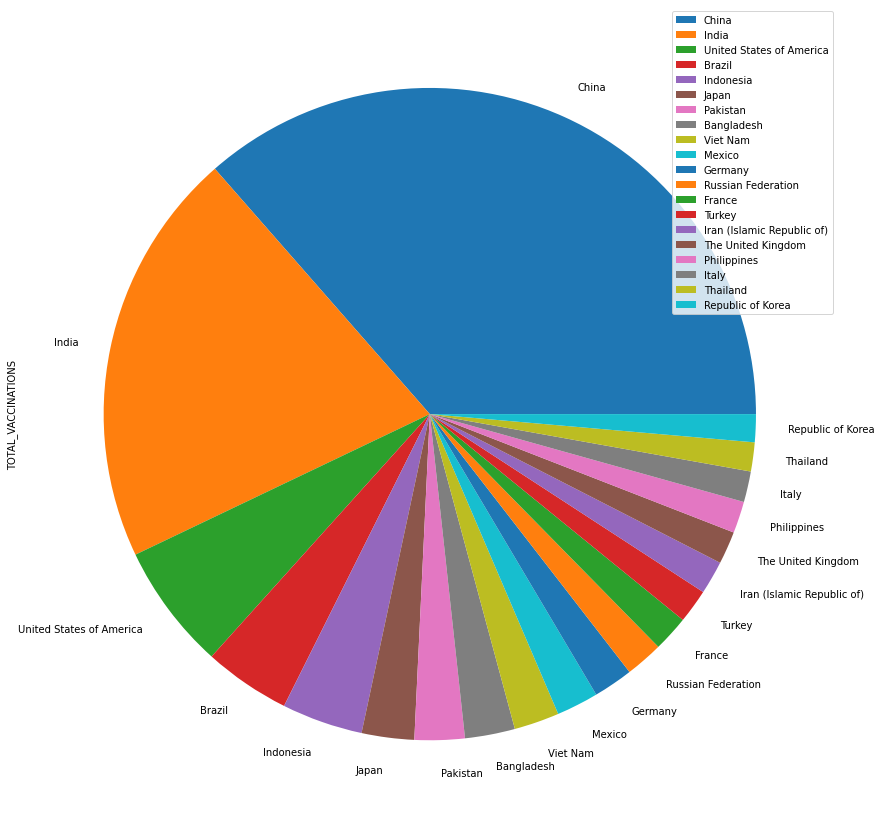

In [12]:
import matplotlib.pyplot as plt

vac = vac.sort_values(by='TOTAL_VACCINATIONS', ascending=False)
top20 = vac[['TOTAL_VACCINATIONS']][:20]
countries = vac['COUNTRY'][:20]
top20.index = countries

top20.plot.pie(y='TOTAL_VACCINATIONS', figsize=(15,15))

:::{tip}
`plot()` is a convinient way to visualize data in `pandas`, but it is
not perfect. We will learn more about the data visualization in following lectures.
:::

## Select

`Pandas` provides different ways to select elements in the `DataFrame`.
### `iloc`
`iloc[n]` will give the $n-1$ rows of the `DataFrame`, i.e., a `Series`.

In [13]:
vac.iloc[0]

COUNTRY                                                                             China
ISO3                                                                                  CHN
WHO_REGION                                                                           WPRO
DATA_SOURCE                                                                     REPORTING
DATE_UPDATED                                                                   2022-02-27
TOTAL_VACCINATIONS                                                             3138003103
PERSONS_VACCINATED_1PLUS_DOSE                                                1276556393.0
TOTAL_VACCINATIONS_PER100                                                         213.283
PERSONS_VACCINATED_1PLUS_DOSE_PER100                                               86.765
PERSONS_FULLY_VACCINATED                                                     1235633241.0
PERSONS_FULLY_VACCINATED_PER100                                                    83.983
VACCINES_U

:::{tip}
`iloc` index starts from $0$, instead of $1$. So the $n$-rows has a index $n-1$.
:::

In order to select multiple rows, just feed a list containing indices to the `iloc`:

In [14]:
vac.iloc[[0, 1, 2]]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
43,China,CHN,WPRO,REPORTING,2022-02-27,3138003103,1.276556e+09,213.283,86.765,1.235633e+09,83.983,"Anhui ZL - Recombinant,Beijing CNBG - BBIBP-Co...",2020-07-22,8.0
94,India,IND,SEARO,REPORTING,2022-02-28,1776718549,9.642345e+08,128.747,69.872,7.923996e+08,57.420,"Bharat - Covaxin,Gamaleya - Gam-Covid-Vac,Jans...",2021-01-16,6.0
218,United States of America,USA,AMRO,REPORTING,2022-02-25,537567013,2.531571e+08,162.406,76.482,2.101726e+08,63.496,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-14,3.0


Also, you can select both rows and columns at the same time:

In [15]:
vac.iloc[[0, 1, 2], [0, 4, 5]]

,COUNTRY,DATE_UPDATED,TOTAL_VACCINATIONS
43,China,2022-02-27,3138003103
94,India,2022-02-28,1776718549
218,United States of America,2022-02-25,537567013


Or just access single element:

In [16]:
vac.iloc[0, 4]

'2022-02-27'

:::{seealso}
You can also use [slice operations](lec-2.html#slice-operations) to access elements, try `vac.iloc[0:2, 0:3]`
:::
### `loc`

As you can see, `iloc` may be confused to read because it uses numbers as index. However,
`loc` provides another way to access by index and columns in `DataFrame`.

In [17]:
vac.loc[0:3, ["COUNTRY", "DATE_UPDATED", "TOTAL_VACCINATIONS"]]

,COUNTRY,DATE_UPDATED,TOTAL_VACCINATIONS
0,Afghanistan,2022-03-06,5597130
134,Mongolia,2022-02-25,5568712
114,Lebanon,2022-02-28,5452304
50,Croatia,2022-02-20,5179921
87,Guinea,2022-03-03,5159979
...,...,...,...
151,Northern Mariana Islands (Commonwealth of the),2022-02-04,105295
68,Faroe Islands,2022-02-18,103894
132,Micronesia (Federated States of),2022-02-16,97185
82,Grenada,2022-02-25,85891


:::{important}
Becareful with the **index** names in `iloc` and `loc`. They are different.
:::

### Boolean access
Both `loc` and `iloc` accept boolean parameters:

In [18]:
vac[vac['TOTAL_VACCINATIONS'] > 100000000]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
43,China,CHN,WPRO,REPORTING,2022-02-27,3138003103,1.276556e+09,213.283,86.765,1.235633e+09,83.983,"Anhui ZL - Recombinant,Beijing CNBG - BBIBP-Co...",2020-07-22,8.0
94,India,IND,SEARO,REPORTING,2022-02-28,1776718549,9.642345e+08,128.747,69.872,7.923996e+08,57.420,"Bharat - Covaxin,Gamaleya - Gam-Covid-Vac,Jans...",2021-01-16,6.0
218,United States of America,USA,AMRO,REPORTING,2022-02-25,537567013,2.531571e+08,162.406,76.482,2.101726e+08,63.496,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-14,3.0
29,Brazil,BRA,AMRO,REPORTING,2022-02-25,369527744,1.723341e+08,173.847,81.076,1.487775e+08,69.993,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2021-01-17,5.0
95,Indonesia,IDN,SEARO,REPORTING,2022-03-01,345697245,1.909768e+08,126.387,69.821,1.445058e+08,52.831,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-01-13,7.0
103,Japan,JPN,WPRO,REPORTING,2022-02-24,223820819,1.016722e+08,176.966,80.388,1.001786e+08,79.207,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Nov...",2021-02-17,4.0
155,Pakistan,PAK,EMRO,REPORTING,2022-02-28,213532343,1.243097e+08,96.668,56.276,1.000965e+08,45.315,"Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Can...",2021-02-03,8.0
16,Bangladesh,BGD,SEARO,REPORTING,2022-03-01,213176935,1.246919e+08,129.442,75.713,8.461175e+07,51.377,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-01-27,8.0
223,Viet Nam,VNM,WPRO,REPORTING,2022-02-24,192865986,7.946939e+07,198.139,81.642,7.532254e+07,77.382,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0
131,Mexico,MEX,AMRO,REPORTING,2022-02-25,179274307,8.508365e+07,139.045,65.991,7.875005e+07,61.078,"AstraZeneca - Vaxzevria,CanSino - Convidecia,G...",2020-12-24,7.0


### Modify